# 30th Sept

In [1]:
import tweepy
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from tweepy.auth import OAuthHandler

In [2]:
path = r'/home/edmundotome/Documents/Github Projects/LogAPItwitter.csv'
log = pd.read_csv(path)

In [3]:
consumerKey = log['API Key'][0]
consumerSecret = log['API Key Secret'][0]

accessToken = log['Access Token'][0]
accessTokenSecret = log['Access Token Secret'][0]

In [4]:
auth = OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
#gather 1000 tweets about Bitcoin and filter out any retweets 'RT'
search_term = '#bitcoin -filter:retweets'

#create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-09-30', tweet_mode='extended').items(1000)

#store tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [6]:
#create a dataframe to store the tweets with a column called 'tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#show the first 5 rows of data
df.head(10)

,Tweets
0,@intocryptoverse #Bitcoin is a joke
1,@BKEXGlobal #bluesparrow will take over the wo...
2,@WatcherGuru #bluesparrow will take over the w...
3,[NEW] Spain Wants to be a Crypto Hub with 100 ...
4,BTC can recive to 57K then Dump!!! for BINANCE...
5,Crypto Charts See Green With Altcoins Despite ...
6,💰 CRYPTO BUYS (01/17/2022 02:01)\n- Dogecoin: ...
7,#WestAssist payment #88!!\n1182 $WEST is been ...
8,@airdropinspect Excellent project.I hope it wi...
9,Our trading bots just closed a signal for MKRU...


In [7]:
#create a function to clean the tweets 
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt)
  twt = re.sub('#BTC', 'Bitcoin', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with a '#'
  twt = re.sub('\\n', '', twt) #removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) #removes any hyperlinks
  return twt

In [8]:
#clean the tweets
df['Cleaned Tweets'] = df['Tweets'].apply(cleanTwt)
#show the dataset
df.head()

,Tweets,Cleaned Tweets
0,@intocryptoverse #Bitcoin is a joke,@intocryptoverse Bitcoin is a joke
1,@BKEXGlobal #bluesparrow will take over the wo...,@BKEXGlobal will take over the worldThe world...
2,@WatcherGuru #bluesparrow will take over the w...,@WatcherGuru will take over the worldThe worl...
3,[NEW] Spain Wants to be a Crypto Hub with 100 ...,[NEW] Spain Wants to be a Crypto Hub with 100 ...
4,BTC can recive to 57K then Dump!!! for BINANCE...,BTC can recive to 57K then Dump!!! for BINANCE...


In [9]:
#create a function to get subjetivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#create a function to get polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#create two new columns called 'Subjetivity' and 'Polarity'
df['Subjetivity'] = df['Cleaned Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Cleaned Tweets'].apply(getPolarity)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity
0,@intocryptoverse #Bitcoin is a joke,@intocryptoverse Bitcoin is a joke,0.000000,0.000000
1,@BKEXGlobal #bluesparrow will take over the wo...,@BKEXGlobal will take over the worldThe world...,0.000000,0.000000
2,@WatcherGuru #bluesparrow will take over the w...,@WatcherGuru will take over the worldThe worl...,0.000000,0.000000
3,[NEW] Spain Wants to be a Crypto Hub with 100 ...,[NEW] Spain Wants to be a Crypto Hub with 100 ...,0.277273,0.168182
4,BTC can recive to 57K then Dump!!! for BINANCE...,BTC can recive to 57K then Dump!!! for BINANCE...,0.000000,0.000000
5,Crypto Charts See Green With Altcoins Despite ...,Crypto Charts See Green With Altcoins Despite ...,0.300000,-0.200000
6,💰 CRYPTO BUYS (01/17/2022 02:01)\n- Dogecoin: ...,💰 CRYPTO BUYS (01/17/2022 02:01)- Dogecoin: $0...,0.000000,0.000000
7,#WestAssist payment #88!!\n1182 $WEST is been ...,payment !!1182 $WEST is been paid to all our ...,0.000000,0.000000
8,@airdropinspect Excellent project.I hope it wi...,@airdropinspect Excellent project.I hope it wi...,0.625000,0.850000
9,Our trading bots just closed a signal for MKRU...,Our trading bots just closed a signal for MKRU...,0.100000,-0.100000


In [10]:
#create a function to get sentiment text 
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [11]:
#create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity,Sentiment
0,@intocryptoverse #Bitcoin is a joke,@intocryptoverse Bitcoin is a joke,0.000000,0.000000,Neutral
1,@BKEXGlobal #bluesparrow will take over the wo...,@BKEXGlobal will take over the worldThe world...,0.000000,0.000000,Neutral
2,@WatcherGuru #bluesparrow will take over the w...,@WatcherGuru will take over the worldThe worl...,0.000000,0.000000,Neutral
3,[NEW] Spain Wants to be a Crypto Hub with 100 ...,[NEW] Spain Wants to be a Crypto Hub with 100 ...,0.277273,0.168182,Positive
4,BTC can recive to 57K then Dump!!! for BINANCE...,BTC can recive to 57K then Dump!!! for BINANCE...,0.000000,0.000000,Neutral
5,Crypto Charts See Green With Altcoins Despite ...,Crypto Charts See Green With Altcoins Despite ...,0.300000,-0.200000,Negative
6,💰 CRYPTO BUYS (01/17/2022 02:01)\n- Dogecoin: ...,💰 CRYPTO BUYS (01/17/2022 02:01)- Dogecoin: $0...,0.000000,0.000000,Neutral
7,#WestAssist payment #88!!\n1182 $WEST is been ...,payment !!1182 $WEST is been paid to all our ...,0.000000,0.000000,Neutral
8,@airdropinspect Excellent project.I hope it wi...,@airdropinspect Excellent project.I hope it wi...,0.625000,0.850000,Positive
9,Our trading bots just closed a signal for MKRU...,Our trading bots just closed a signal for MKRU...,0.100000,-0.100000,Negative


/home/edmundotome/anaconda3/envs/Signal-Processing/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


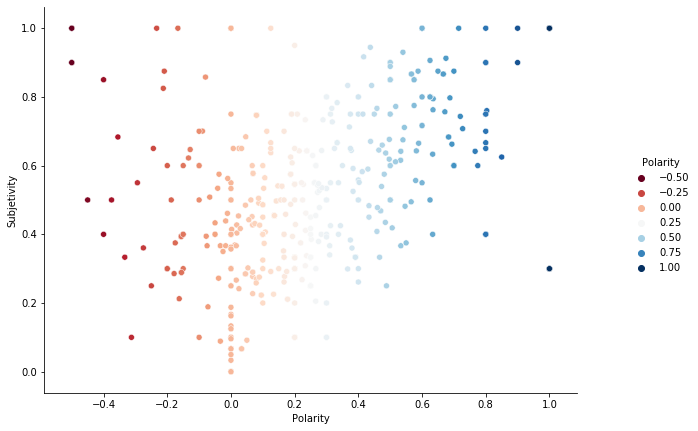

In [12]:
ax = sns.relplot(df['Polarity'], df['Subjetivity'], hue = df['Polarity'], palette='RdBu')
ax.fig.set_size_inches(10,6)

norm = plt.Normalize(df['Polarity'].min(), df['Polarity'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

plt.show()

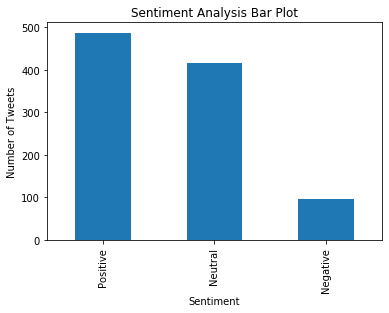

In [13]:
#create a barchar to show the count of positive, neutral and negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [14]:
df['Sentiment'].value_counts()

Positive    487
Neutral     416
Negative     97
Name: Sentiment, dtype: int64

In [15]:
val_count = list(df['Sentiment'].value_counts())
val_count

[487, 416, 97]

In [16]:
lst_df = list(df['Sentiment'].value_counts())
lst_df

[487, 416, 97]

In [17]:
dfs = pd.read_csv("r_sentiments.csv")
  
# updating the column value/data
dfs.loc[2, 'Sentiment'] = 'day 3'
dfs.loc[2, 'Positive'] = lst_df[0]
dfs.loc[2, 'Neutral'] = lst_df[1]
dfs.loc[2, 'Negative'] = lst_df[2]
  
# writing into the file
dfs.to_csv("r_sentiments.csv", index=False)
  
print(dfs)

  Sentiment  Positive  Neutral  Negative
0     day 1     494.0    372.0     134.0
1     day 2     494.0    388.0     118.0
2     day 3     487.0    416.0      97.0
